In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# --- Import dataset ---
# Skip the first metadata row ("Count of Births by Name...") by setting header=1
df = pd.read_csv("Baby_Names.csv", header=1)

# --- Initial data inspection ---
# Check how many missing values exist in each column
print("Missing values per column:")
print(df.isna().sum(), "\n")

# Check the data types to identify any mixed or incorrect types (object instead of int, etc.)
print("Data types before cleaning:")
print(df.dtypes, "\n")

# --- Quick sanity checks on numeric ranges ---
# View the earliest and latest year in the dataset
print("Year range:", df['Year'].min(), "to", df['Year'].max())

# View basic descriptive statistics for the 'Count' column (birth counts)
print("\nDescriptive stats for 'Count':")
print(df['Count'].describe(), "\n")

# --- Convert columns to numeric types (in case of mixed types) ---
# Coerce errors replaces non-numeric values with NaN for later cleaning
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Count'] = pd.to_numeric(df['Count'], errors='coerce')

# --- Verify that conversion worked correctly ---
print("Data types after cleaning:")
print(df.dtypes, "\n")

# Display the first few rows to confirm data looks correct
print("Preview of cleaned data:")
print(df.head())

Missing values per column:
Year     0
Name     0
Sex      0
Count    0
dtype: int64 

Data types before cleaning:
Year      int64
Name     object
Sex      object
Count     int64
dtype: object 

Year range: 1880 to 2024

Descriptive stats for 'Count':
count    2.148744e+06
mean     1.730881e+02
std      1.463732e+03
min      5.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      3.200000e+01
max      9.969300e+04
Name: Count, dtype: float64 

Data types after cleaning:
Year      int64
Name     object
Sex      object
Count     int64
dtype: object 

Preview of cleaned data:
   Year    Name Sex  Count
0  2024    Liam   M  22164
1  2024    Noah   M  20337
2  2024  Oliver   M  15343
3  2024  Olivia   F  14718
4  2024    Emma   F  13485


/var/folders/1v/d265l3ks51x5svspj6rx8y3c0000gn/T/ipykernel_58986/1121901516.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Year']==latest_year][df['Sex']=='F']
/var/folders/1v/d265l3ks51x5svspj6rx8y3c0000gn/T/ipykernel_58986/1121901516.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Year']==latest_year][df['Sex']=='M']
/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Top 5 Female Names: ['Olivia', 'Emma', 'Amelia', 'Charlotte', 'Mia']
Top 5 Male Names: ['Liam', 'Noah', 'Oliver', 'Theodore', 'James']


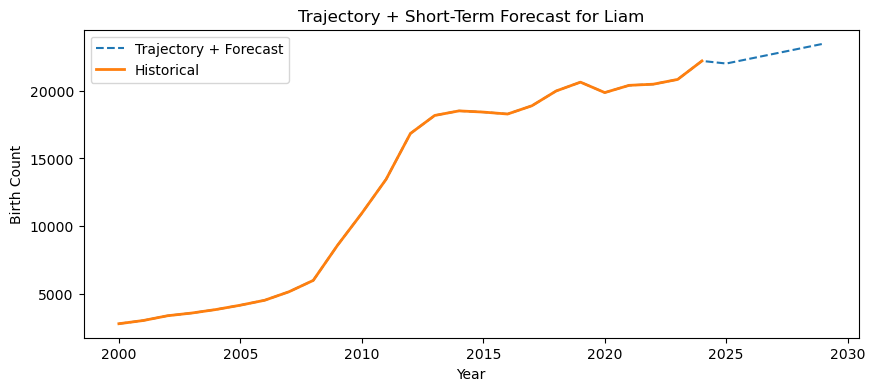

Liam: short-term trend is **rising** (slope = 365.53)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


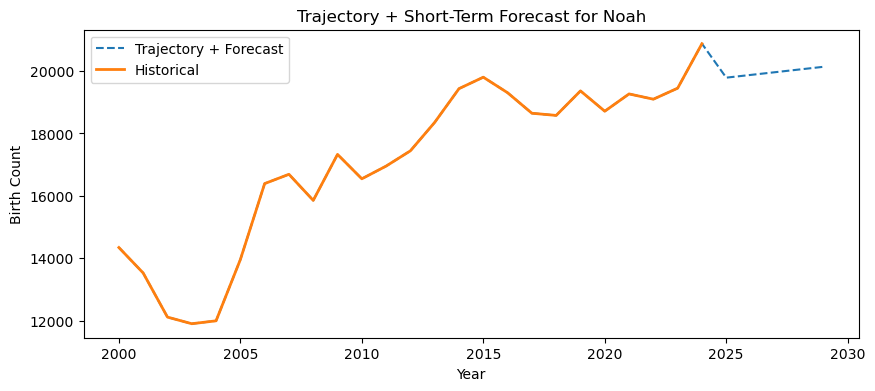

Noah: short-term trend is **rising** (slope = 86.94)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


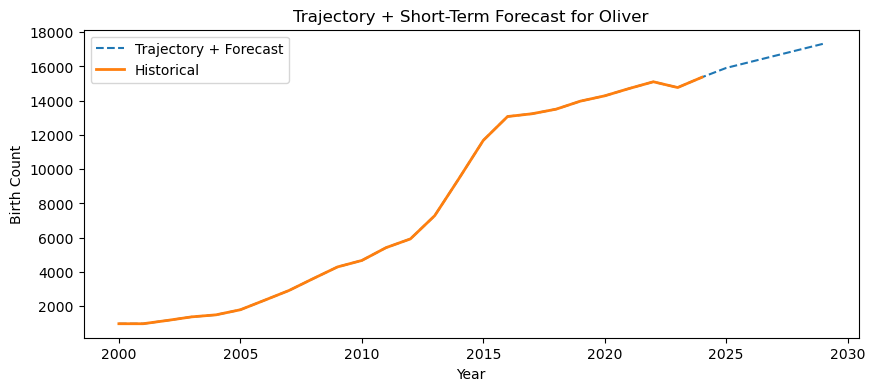

Oliver: short-term trend is **rising** (slope = 353.16)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


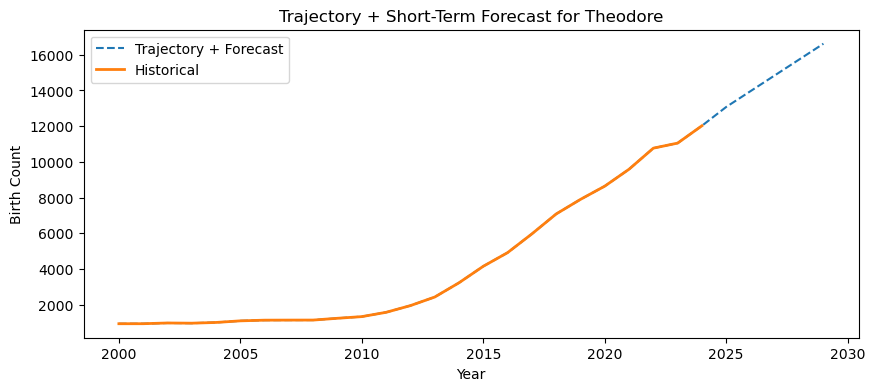

Theodore: short-term trend is **rising** (slope = 885.22)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


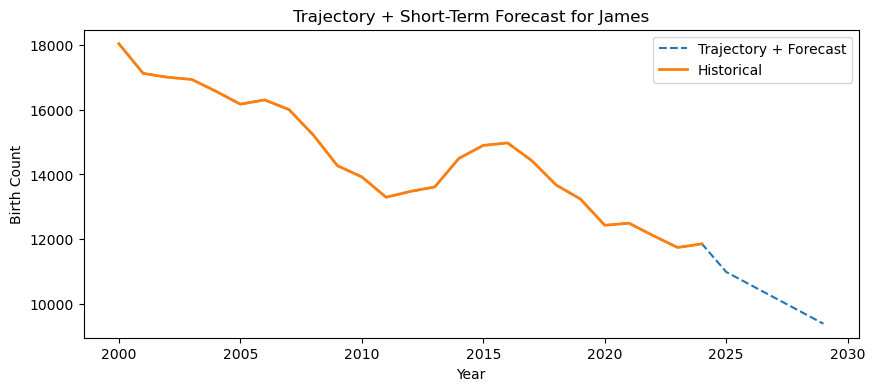

James: short-term trend is **falling** (slope = -398.61)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


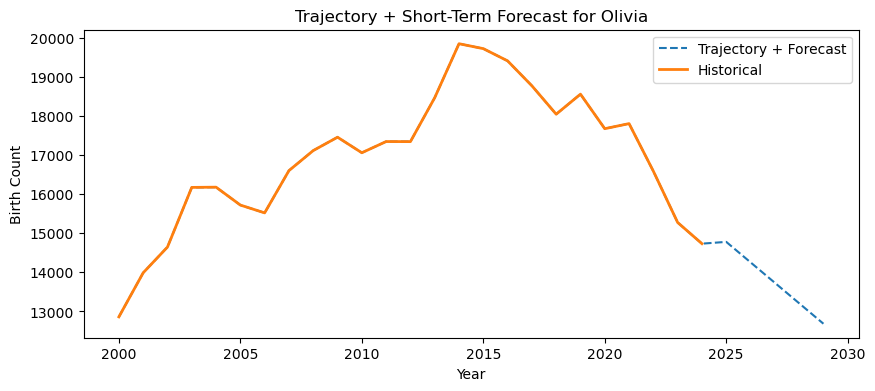

Olivia: short-term trend is **falling** (slope = -523.78)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


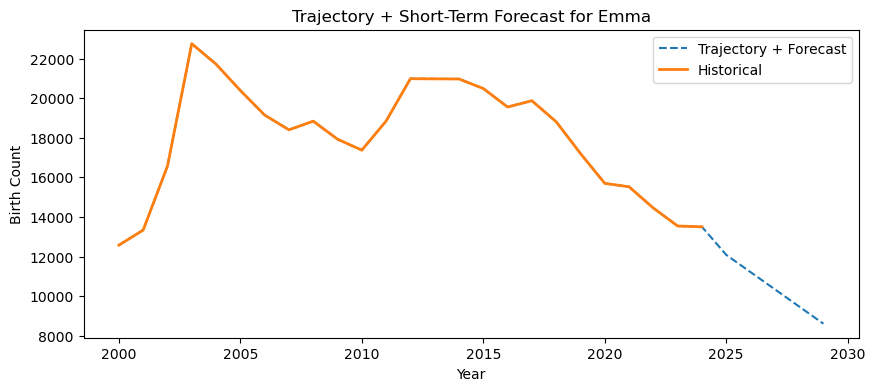

Emma: short-term trend is **falling** (slope = -869.23)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


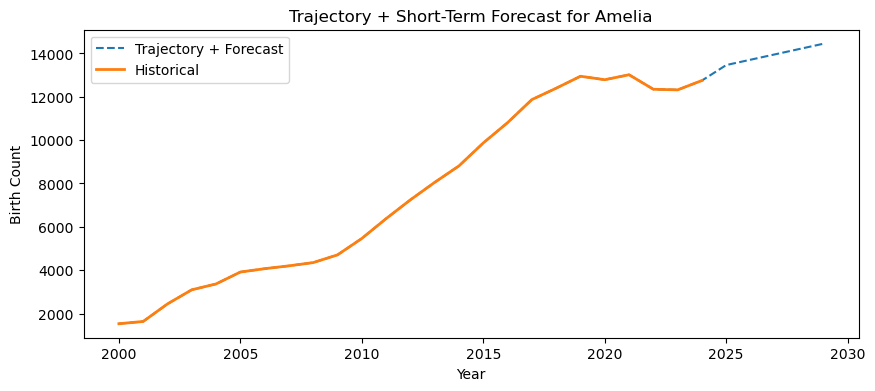

Amelia: short-term trend is **rising** (slope = 245.93)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


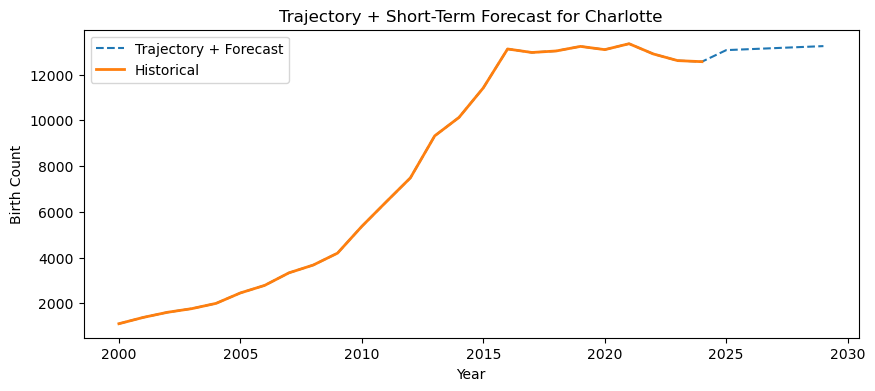

Charlotte: short-term trend is **rising** (slope = 43.85)


/Users/adamcartwright/.local/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


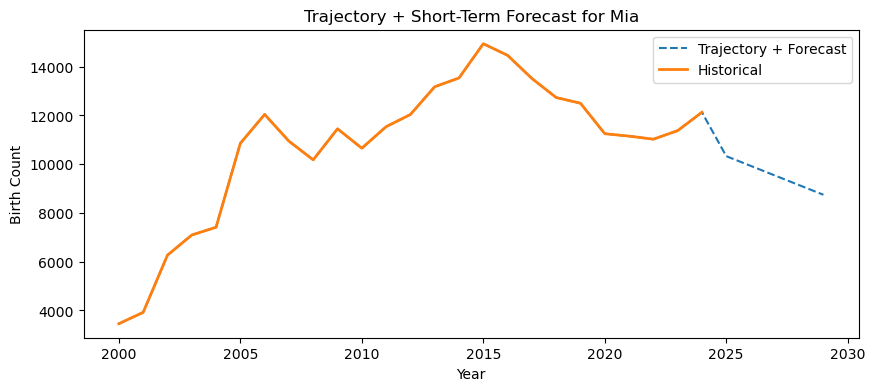

Mia: short-term trend is **falling** (slope = -396.32)


In [10]:
# Find most recent year
latest_year = df['Year'].max()

# Get top 5 female and top 5 male names in the latest year
top5_f = (
    df[df['Year']==latest_year][df['Sex']=='F']
    .sort_values('Count', ascending=False)
    .head(5)['Name']
    .tolist()
)

top5_m = (
    df[df['Year']==latest_year][df['Sex']=='M']
    .sort_values('Count', ascending=False)
    .head(5)['Name']
    .tolist()
)

print("Top 5 Female Names:", top5_f)
print("Top 5 Male Names:", top5_m)

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def forecast_name_trajectory(name, window=10, years_forward=5):
    df_name = (
        df[df['Name']==name]
        .groupby('Year')['Count']
        .sum()
        .reset_index()
    )

    if len(df_name) < window:
        print(f"Not enough data to forecast {name}.")
        return None

    # === Short-term training data (last N years) ===
    df_recent = df_name.tail(window)

    X = df_recent[['Year']]
    y = df_recent['Count']

    model = LinearRegression().fit(X, y)

    # === Future years ===
    max_year = df_name['Year'].max()
    future_years = np.arange(max_year+1, max_year+1+years_forward)
    preds = model.predict(future_years.reshape(-1,1))

    # === Only show the last 25 years in the plot ===
    df_name_plot = df_name[df_name['Year'] >= 2000]

    # === Combine historical + first forecast point for a connected line ===
    combined_years = np.concatenate([df_name_plot['Year'], future_years])
    combined_counts = np.concatenate([df_name_plot['Count'], preds])

    # === Plot ===
    plt.figure(figsize=(10,4))

    # plot connected line
    plt.plot(combined_years, combined_counts, label="Trajectory + Forecast", linestyle='--')

    # also plot actual historical data with solid line
    plt.plot(df_name_plot['Year'], df_name_plot['Count'], label="Historical", linewidth=2)

    plt.title(f"Trajectory + Short-Term Forecast for {name}")
    plt.xlabel("Year")
    plt.ylabel("Birth Count")
    plt.legend()
    plt.show()

    # === Report direction ===
    slope = model.coef_[0]
    direction = "rising" if slope > 0 else "falling"
    print(f"{name}: short-term trend is **{direction}** (slope = {slope:.2f})")

    return preds

# Forecast top 5 boys
for name in top5_m:
    forecast_name_trajectory(name, window=10, years_forward=5)

# Forecast top 5 girls
for name in top5_f:
    forecast_name_trajectory(name, window=10, years_forward=5)